In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_jetrail.csv")
test=pd.read_csv("test_jetrail.csv")

In [3]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [4]:
train_original=train.copy() 
test_original=test.copy()

In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [8]:
train.head(),test.head()

(   ID          Datetime  Count
 0   0  25-08-2012 00:00      8
 1   1  25-08-2012 01:00      2
 2   2  25-08-2012 02:00      6
 3   3  25-08-2012 03:00      2
 4   4  25-08-2012 04:00      2,       ID          Datetime
 0  18288  26-09-2014 00:00
 1  18289  26-09-2014 01:00
 2  18290  26-09-2014 02:00
 3  18291  26-09-2014 03:00
 4  18292  26-09-2014 04:00)

In [9]:
train.describe(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


(                 ID         Count
 count  18288.000000  18288.000000
 mean    9143.500000    138.958115
 std     5279.435197    153.467461
 min        0.000000      2.000000
 25%     4571.750000     22.000000
 50%     9143.500000     84.000000
 75%    13715.250000    210.000000
 max    18287.000000   1244.000000, None)

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [10]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')

    We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [11]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

    We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

    Values of 5 and 6 represents that the days are weekend.

In [12]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [13]:
train

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3


Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend

In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

Let’s look at the time series.

In [15]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
ts

Datetime
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
                      ... 
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

C:\Users\arabn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


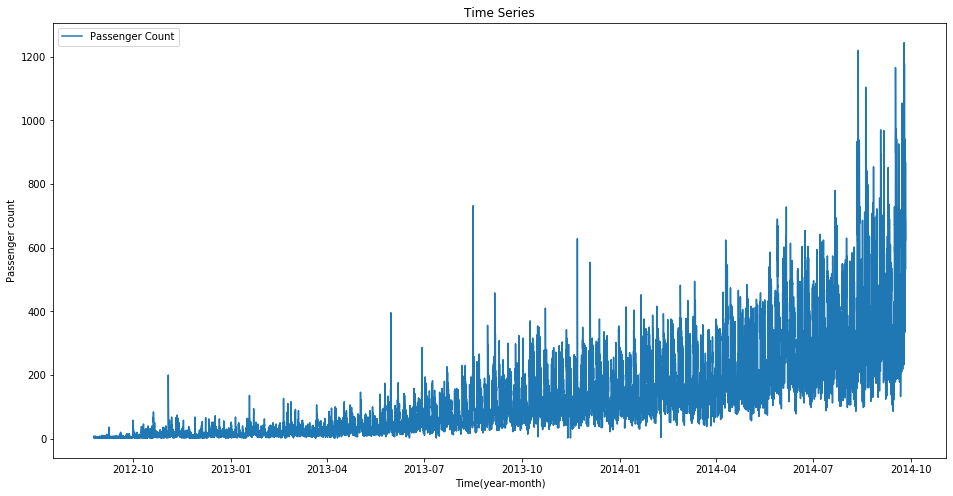

In [16]:
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Lets recall the hypothesis that we made earlier:

    Traffic will increase as the years pass by
    Traffic will be high from May to October
    Traffic on weekdays will be more
    Traffic during the peak hours will be high

After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.
5) Exploratory Analysis

Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

In [17]:
train.groupby('year')['Count'].mean()

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64

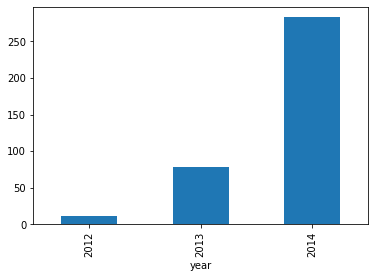

In [18]:
train.groupby('year')['Count'].mean().plot.bar()

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

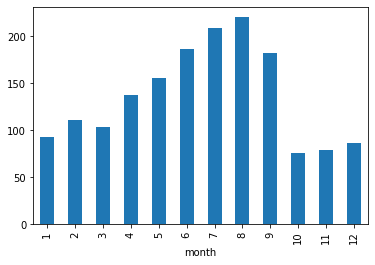

In [19]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

In [20]:
tmp=train.groupby(['year','month'])['Count'].mean()

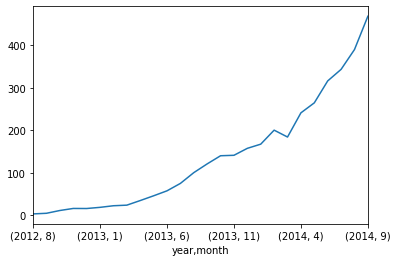

In [21]:
tmp.plot()

Let’s look at the daily mean of passenger count.

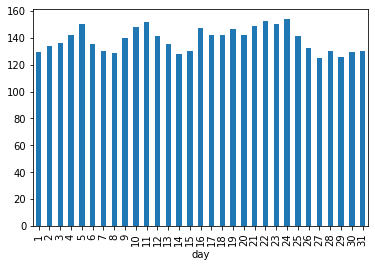

In [22]:
train.groupby('day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

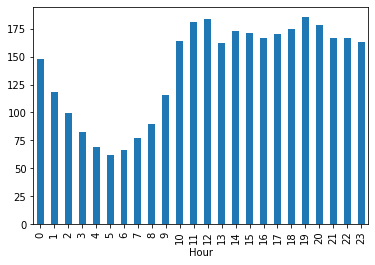

In [23]:
train.groupby('Hour')['Count'].mean().plot.bar()

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

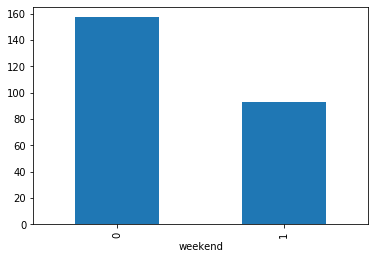

In [24]:
train.groupby('weekend')['Count'].mean().plot.bar()

Now we will try to look at the day wise passenger count.

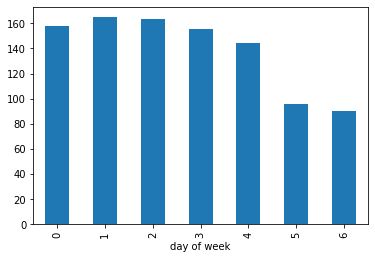

In [25]:
train.groupby('day of week')['Count'].mean().plot.bar()

Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [26]:
train=train.drop('ID',1)
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [27]:
train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 

In [28]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [29]:
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

In [30]:
monthly.Count.head()

Timestamp
2012-08-31     2.952381
2012-09-30     4.444444
2012-10-31    10.986559
2012-11-30    15.827778
2012-12-31    15.680108
Freq: M, Name: Count, dtype: float64

Let’s look at the hourly, daily, weekly and monthly time series.

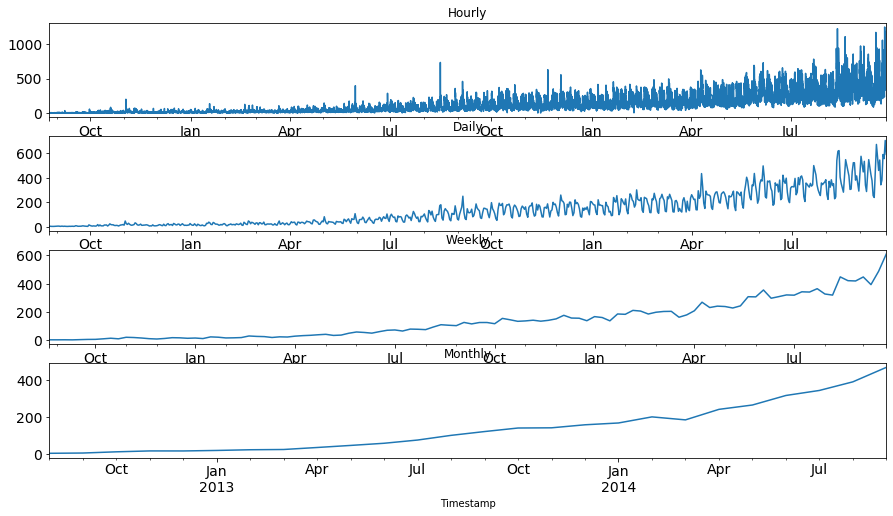

In [31]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [32]:
test['Timestamp'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [33]:
train.head()

,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [34]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

C:\Users\arabn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\arabn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [35]:
Train.shape,valid.shape

((669, 7), (93, 7))

Now we will look at how the train and validation part has been divided.

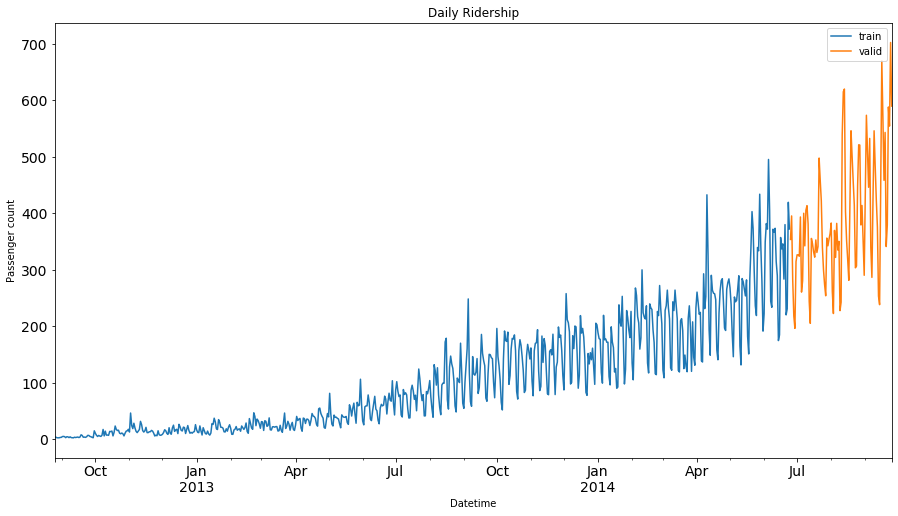

In [36]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

Let’s make predictions using naive approach for the validation set

i) Naive Approach

In [37]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
#dd

In [38]:
y_hat.shape

(93, 7)

In [39]:
y_hat['naive'] = dd[len(dd)-1] 
y_hat.shape

(93, 8)

In [40]:
y_hat.head()

,Count,year,month,day,Hour,day of week,weekend,naive
Timestamp,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667


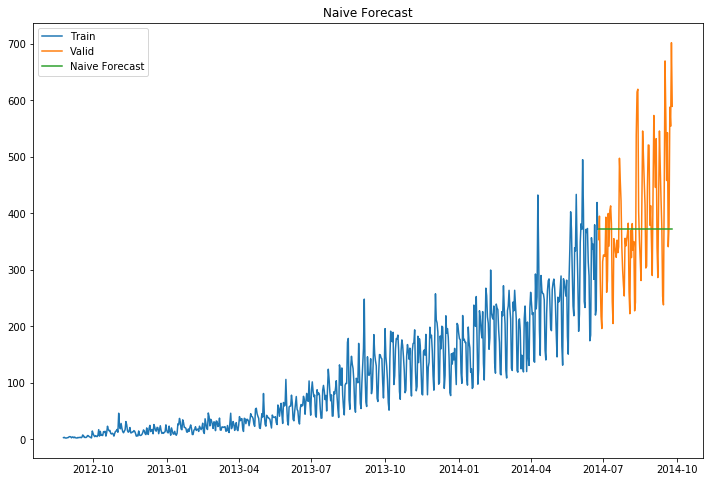

In [41]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

We will now calculate RMSE to check the accuracy of our model on validation data set.

In [42]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


ii) Moving Average
#In this technique we will take the average of the passenger counts for last few time periods only.

Example

Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

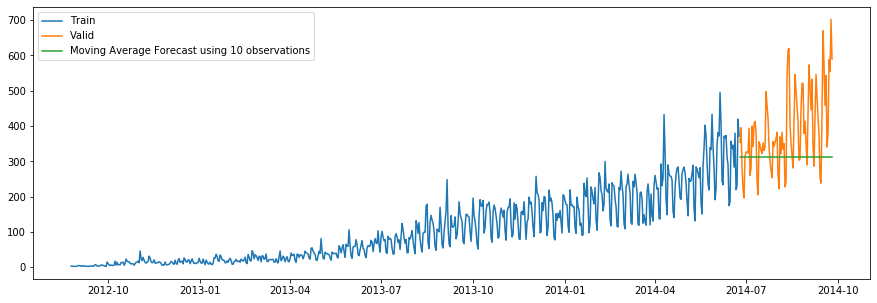

In [43]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

In [44]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

134.23733308950264


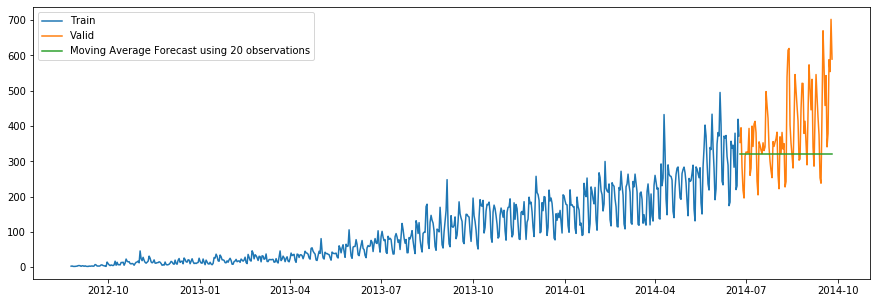

In [45]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 

In [46]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

130.44984977550422


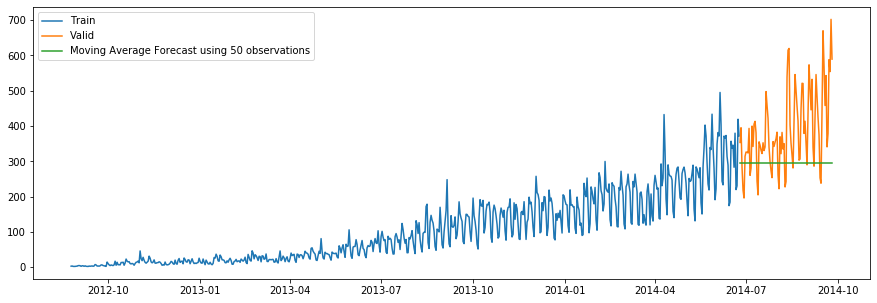

In [47]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()


In [48]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


We can see that the predictions are getting weaker as we increase the number of observations.

iii) Simple Exponential Smoothing

    In this technique, we assign larger weights to more recent observations than to observations from the distant past.
    The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Example

Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 


In [50]:
y_hat_avg['SES']

Timestamp
2014-06-25    363.522492
2014-06-26    363.522492
2014-06-27    363.522492
2014-06-28    363.522492
2014-06-29    363.522492
                 ...    
2014-09-21    363.522492
2014-09-22    363.522492
2014-09-23    363.522492
2014-09-24    363.522492
2014-09-25    363.522492
Freq: D, Name: SES, Length: 93, dtype: float64

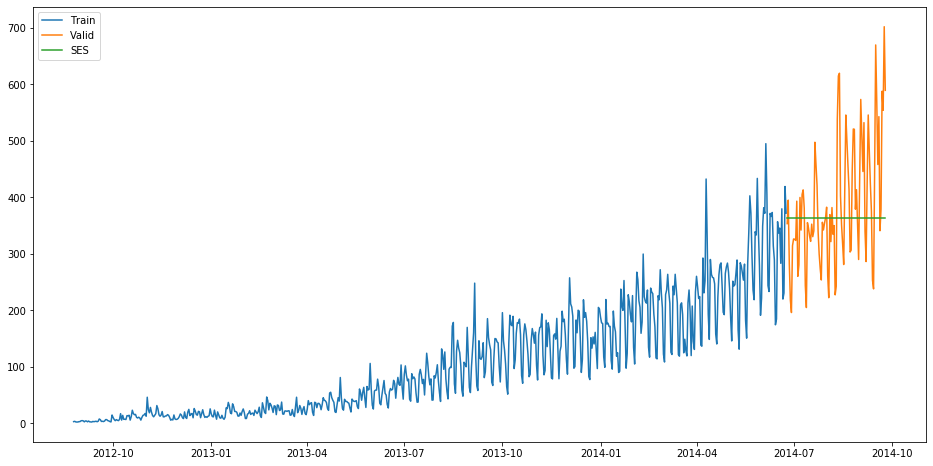

In [51]:
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [52]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


iv) Holt’s Linear Trend Model

    It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
    This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

    Observed, which is the original time series.
    Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
    Seasonal, which tells us about the seasonality in the time series.
    Residual, which is obtained by removing any trend or seasonality in the time series.

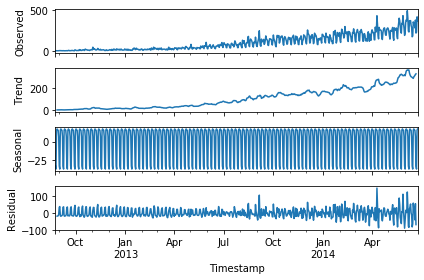

In [53]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

In [54]:
result

(2.986350959013859,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

In [55]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 

In [56]:
y_hat_avg['Holt_linear']

Timestamp
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
                 ...    
2014-09-21    555.376275
2014-09-22    557.884520
2014-09-23    560.392764
2014-09-24    562.901009
2014-09-25    565.409253
Freq: D, Name: Holt_linear, Length: 93, dtype: float64

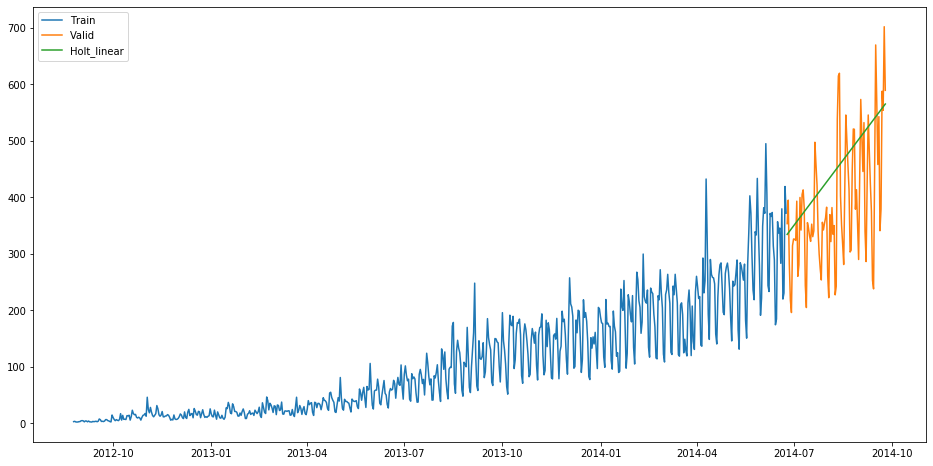

In [57]:
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [58]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


3) Holt’s Linear Trend Model on daily time series

    Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
    We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
    We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

Now let’s load the submission file

In [59]:
submission=pd.read_csv("sample_submission_jetrail.csv")

We only need ID and corresponding Count for the final submission.

Let’s make prediction for the test dataset.

Let’s save these predictions in test file in a new column.

In [60]:
predict=fit1.forecast(len(test))

In [61]:
test['prediction']=predict
test.head()

,ID,year,month,day,Hour,prediction
Timestamp,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [62]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [63]:
train_original

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3.415620e-04
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,2.880454e-04
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,2.762403e-04
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,2.282327e-04


In [64]:
# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()
temp.head()

Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64

In [65]:
# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [66]:
temp2=pd.read_csv("GROUPby.csv") 
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [67]:
temp2=temp2.drop('Hour.1',1)

In [68]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

In [69]:
merge['Hour']=merge['Hour_y'] 
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y,Hour
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4,4


In [70]:
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [71]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [72]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574


In [73]:
prediction['ID']=prediction['ID_y']
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292


In [74]:
#Let’s drop all other features from the submission file and keep ID and Count only.

submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 

In [75]:
submission

,Count,ID
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292
...,...,...
5107,1156.675482,23395
5108,1111.525192,23396
5109,1037.491153,23397
5110,1041.255041,23398


In [76]:
# Converting the final submission to csv format 
#pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

4) Holt winter’s model on daily time series

    Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

    The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

    One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

Let’s first fit the model on training dataset and validate it using the validation dataset.

In [77]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7 ,trend='add', seasonal='add').fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
y_hat_avg['Holt_Winter']

Timestamp
2014-06-25    387.359995
2014-06-26    369.135921
2014-06-27    355.563302
2014-06-28    247.088754
2014-06-29    246.192644
                 ...    
2014-09-21    288.120836
2014-09-22    427.807221
2014-09-23    418.729887
2014-09-24    432.782202
2014-09-25    414.558128
Freq: D, Name: Holt_Winter, Length: 93, dtype: float64

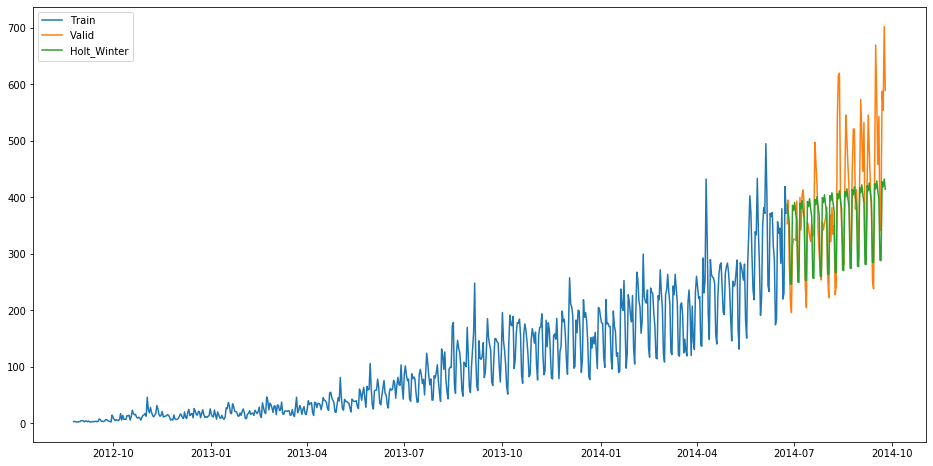

In [78]:
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [79]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.37571191747172


We can see that the rmse value has reduced a lot from this method. Let’s forecast the Counts for the entire length of the Test dataset.

In [82]:
predict=fit1.forecast(len(test))

Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

In [83]:
test['prediction']=predict
test.head()

,ID,year,month,day,Hour,prediction
Timestamp,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,387.359995
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,369.135921
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,355.563302
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,247.088754
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,246.192644


In [84]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

In [85]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [86]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

Let’s drop all features other than ID and Count

In [87]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)
submission.head()

,Count,ID
0,411.716459,18288
1,328.571274,18289
2,278.072500,18290
3,229.761373,18291
4,193.390842,18292


In [88]:
# Converting the final submission to csv format 
#pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

6) Parameter tuning for ARIMA model

First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.
Stationarity Check

    We use Dickey Fuller test to check the stationarity of the series.
    The intuition behind this test is that it determines how strongly a time series is defined by a trend.
    The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
    The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

In [101]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling( window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling( window=24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

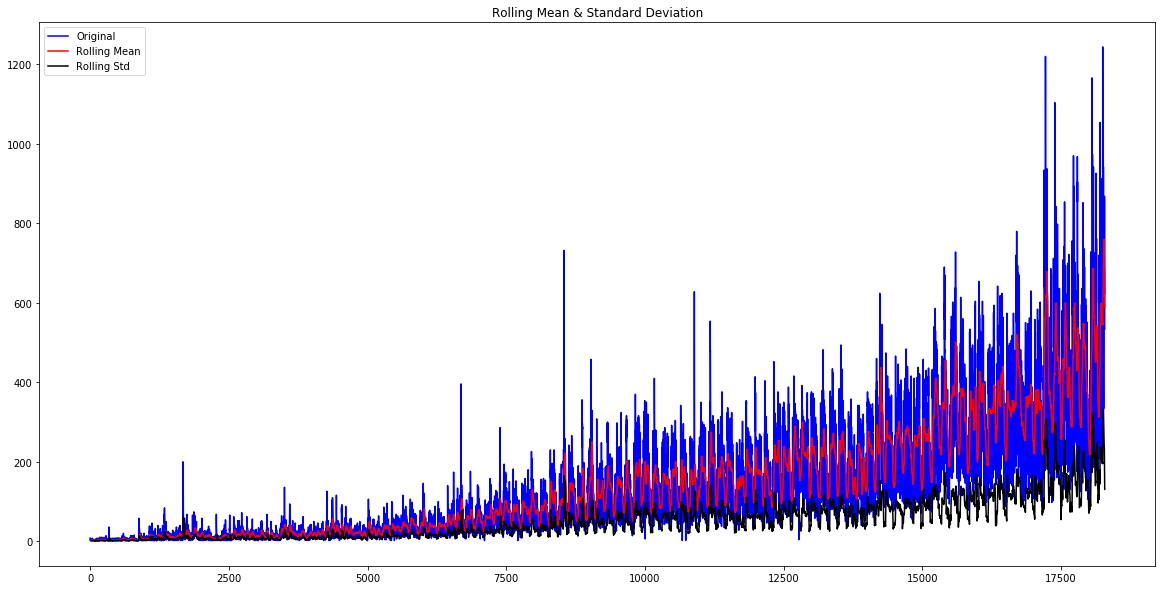

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [102]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

Removing Trend

    A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

    We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

    We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

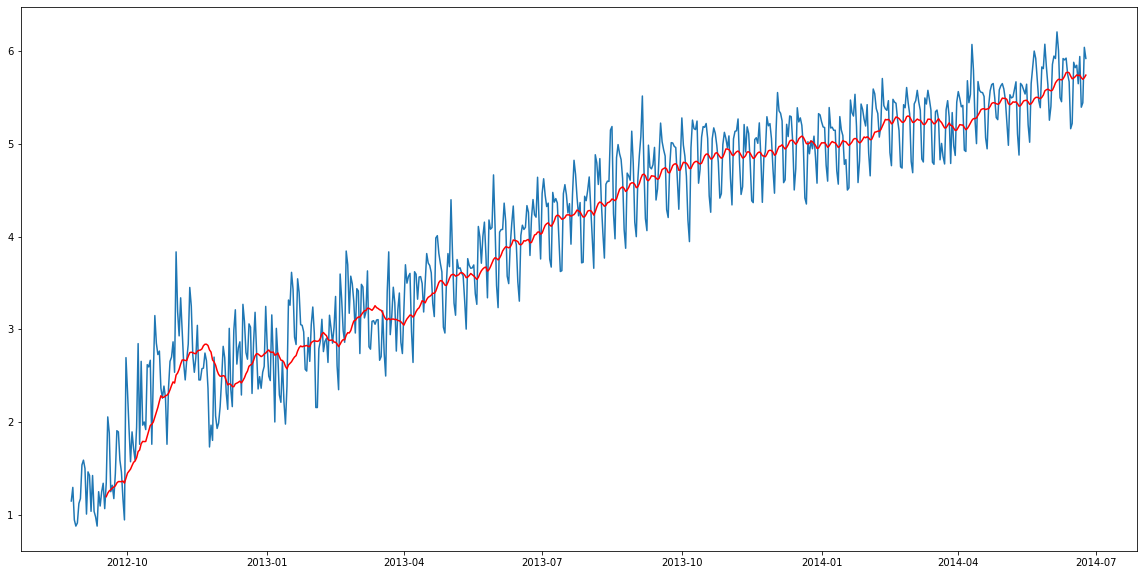

In [104]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling( 24).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

In [105]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff

Timestamp
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
                ...   
2014-06-20    0.200295
2014-06-21   -0.317381
2014-06-22   -0.253342
2014-06-23    0.326990
2014-06-24    0.179745
Freq: D, Name: Count, Length: 669, dtype: float64

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

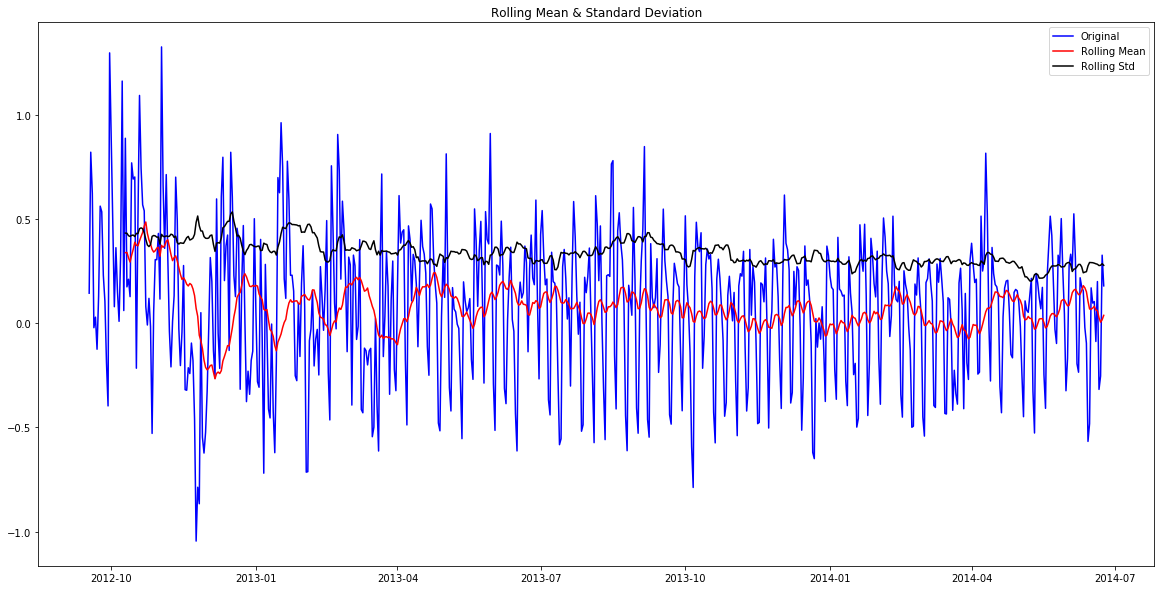

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [106]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

Differencing can help to make the series stable and eliminate the trend.

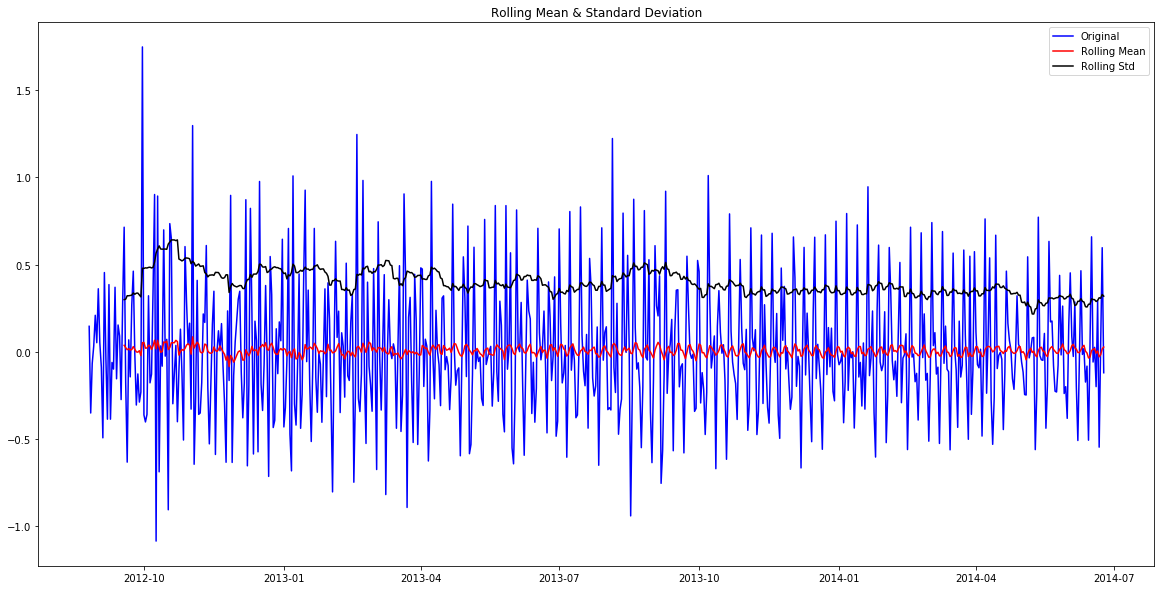

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [107]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

Removing Seasonality

    By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
    Seasonality is always of a fixed and known period.
    We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

In [109]:
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

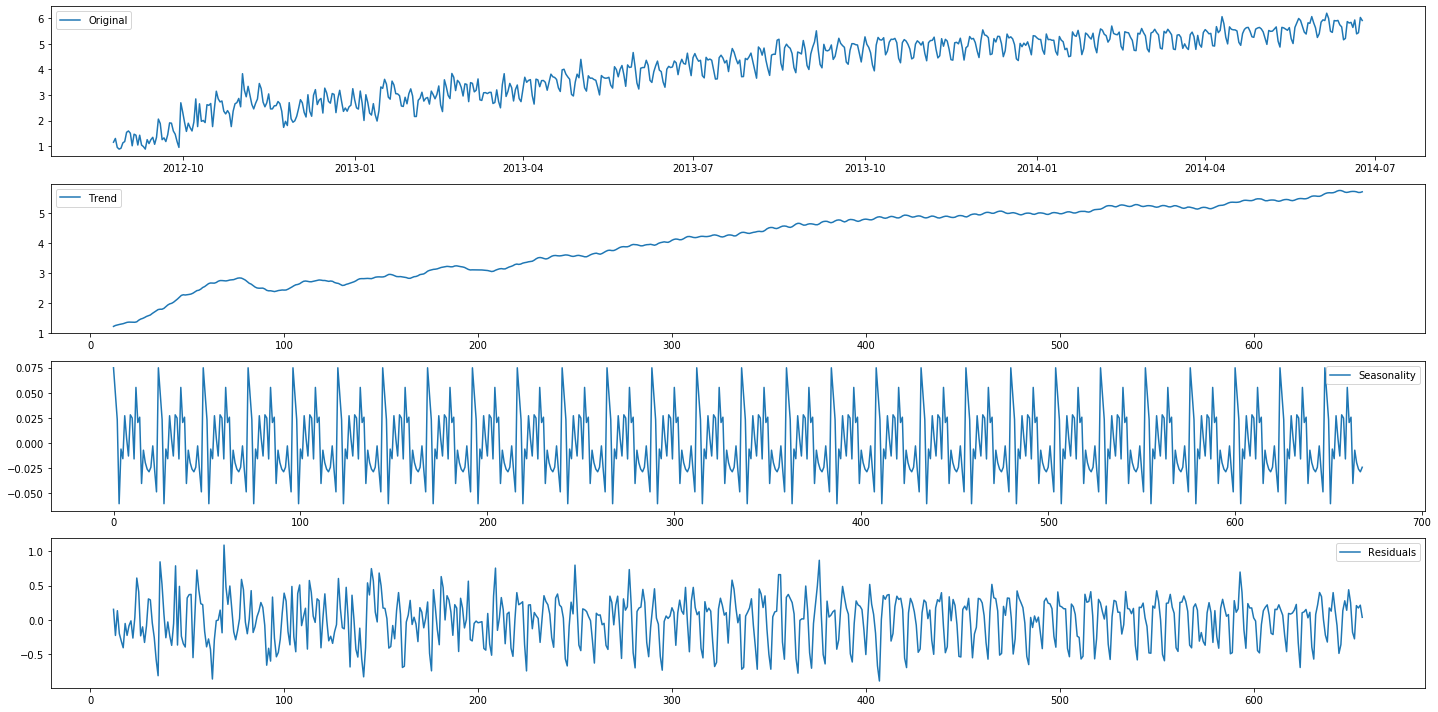

In [111]:
plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

Let’s check stationarity of residuals.

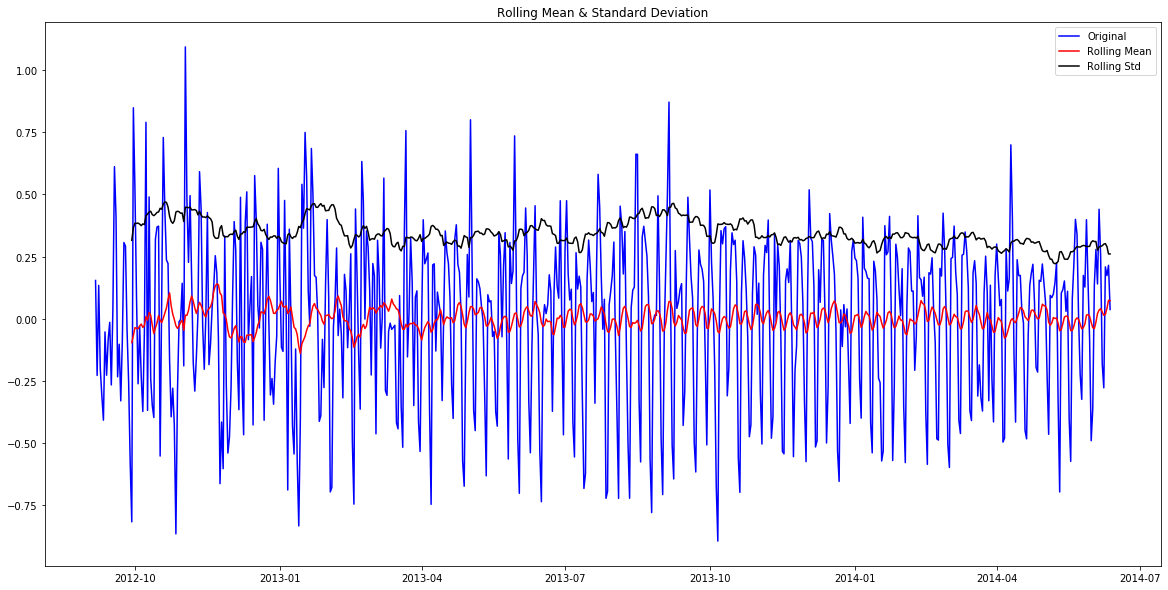

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [113]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

    It can be interpreted from the results that the residuals are stationary.

    Now we will forecast the time series using different models.

Forecasting the time series using ARIMA

    First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

    To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

    ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

    PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparison

In [114]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

C:\Users\arabn\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


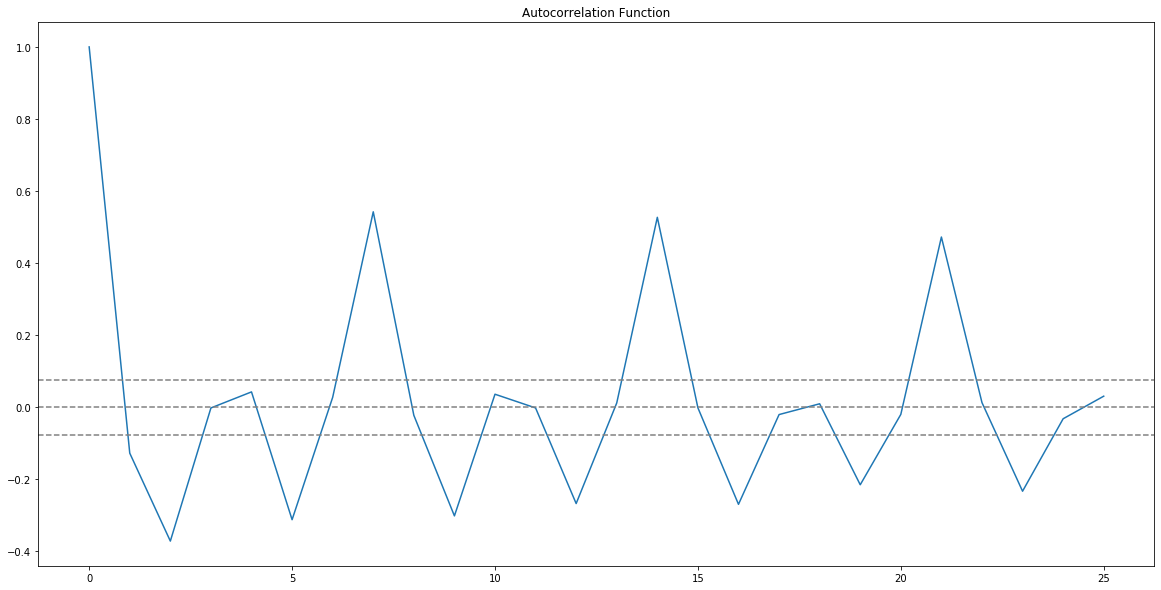

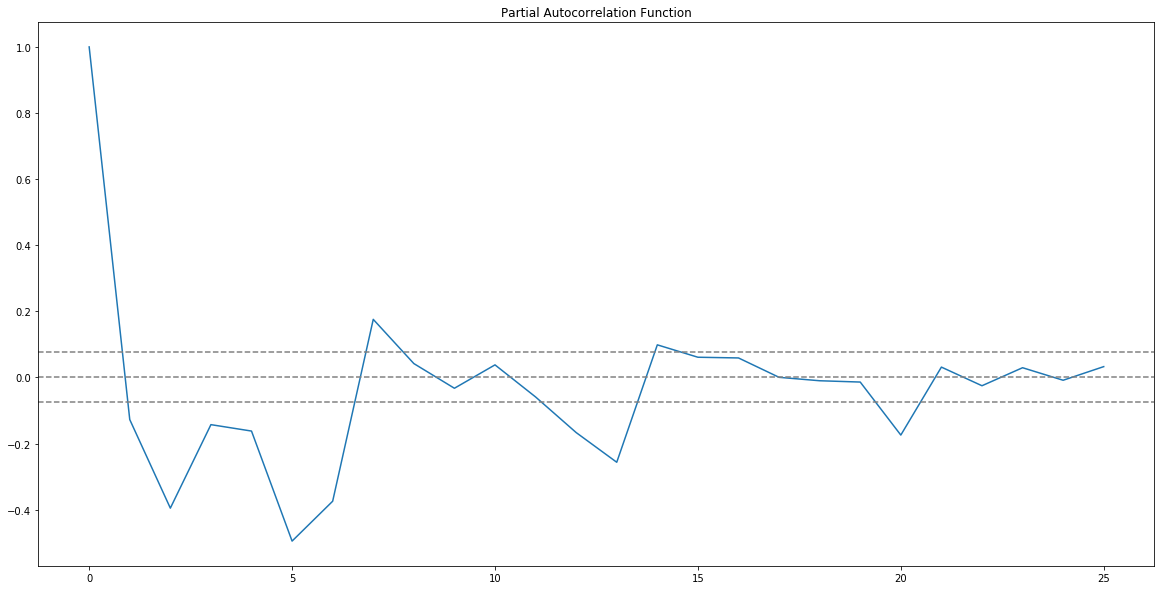

In [116]:
#ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

    p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

    q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

    Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.